In [5]:
import cv2 as cv
import time
import matplotlib.pyplot as plt

In [6]:
# Leemos los clasificadores pre-entrenados (instalados en cv2/data/haarcascades/)
#--------------------------------------------------------------------------------
face_cascade = cv.CascadeClassifier('C:\\Users\\Usuario\Anaconda3\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('C:\\Users\\Usuario\Anaconda3\Lib\site-packages\cv2\data\haarcascade_eye.xml')
smile_cascade = cv.CascadeClassifier('C:\\Users\\Usuario\Anaconda3\Lib\site-packages\cv2\data\haarcascade_smile.xml')

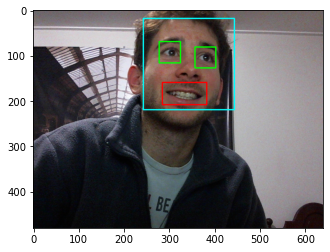

In [20]:
# Cargamos la imagen a analizar
#------------------------------
cap = cv.VideoCapture(0)

# Tomamos el primer frame del video (donde vamos a definir la ROI)
#-----------------------------------------------------------------
ret,originalImage = cap.read()

# Pasamos la imagen a escala de grises
#-------------------------------------
grayImage = cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY)
grayImage = cv.equalizeHist(grayImage)

# Llamamos al clasificador de Haar (AdaBoost)
#--------------------------------------------
#faces = face_cascade.detectMultiScale(grayImage, 1.012, 5)
faces = face_cascade.detectMultiScale(grayImage, 1.1, 5)#, minSize= (100,130),maxSize=(200,400))

# Recorro las caras encontradas
#------------------------------
for (x,y,w,h) in faces:
    # Le dibujamos un rectángulo amarillo
    cv.rectangle(originalImage,(x,y),(x+w,y+h),(255,255,0),2)
    # Definimos las ROIs en la imagen gris y color
    roi_gray = grayImage[y:y+h, x:x+w] 
    roi_color = originalImage[y:y+h, x:x+w] 
    # Para cada rostro hallado le buscamos los ojos y la sonrisa
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smile = smile_cascade.detectMultiScale(roi_gray)
    # A lo hallado le dibujamos rectángulos
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    for (sx,sy,sw,sh) in smile:
#         print(sh)
#         print(sw)
        if sy>45 and sw>95:
            cv.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,255),2)
    

plt.figure()

plt.imshow(cv.cvtColor(originalImage,cv.COLOR_BGR2RGB))
# cv.imshow('Detección de caras con filtros de Haar en cascada',originalImage) 
# cv.waitKey(50)

# time.sleep(10) 
# cv.destroyAllWindows()